In [23]:
#Import dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import math

# Input data files
df=pd.read_csv('micro_world_139countries.csv', encoding='ISO-8859-1')
     

In [2]:
#The data comsists of 143k rows and 128 columns
df.shape

(143887, 128)

Data starts with Afganistan and goes till Zimbabwe

In [3]:
# preview the dataset
df.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [4]:
# preview the dataset
df.tail()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
143882,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,142158626,1.327724,2,22.0,2,5,...,4,4,4.0,4,5.0,1,1,0,0.0,2021
143883,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,166233385,0.271210,1,52.0,2,5,...,1,4,4.0,4,5.0,1,2,1,1.0,2021
143884,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,127205071,0.337621,1,47.0,1,1,...,4,4,4.0,4,5.0,1,2,0,0.0,2021
143885,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,201016006,2.153500,2,18.0,1,3,...,4,4,4.0,4,4.0,2,2,1,1.0,2021
143886,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,204293669,0.271210,1,74.0,3,2,...,4,1,4.0,4,1.0,1,2,1,1.0,2021


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [6]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['economy', 'economycode', 'regionwb']


The responses availabale differs from region to region, the highest series available for China, the lowest for Iceland.

In [7]:
# View frequency counts of values in categorical variables
for var in categorical:
    print(df[var].value_counts()) 

economy
China                 3500
India                 3000
Russian Federation    2011
Indonesia             1062
Lesotho               1025
                      ... 
Guatemala             1000
Ghana                 1000
Zimbabwe              1000
Jamaica                502
Iceland                502
Name: count, Length: 139, dtype: int64
economycode
CHN    3500
IND    3000
RUS    2011
IDN    1062
LSO    1025
       ... 
GTM    1000
GHA    1000
ZWE    1000
JAM     502
ISL     502
Name: count, Length: 139, dtype: int64
regionwb
High income                                           40635
Sub-Saharan Africa (excluding high income)            36062
Europe & Central Asia (excluding high income)         19030
Latin America & Caribbean (excluding high income)     16519
East Asia & Pacific (excluding high income)           12579
Middle East & North Africa (excluding high income)    10053
South Asia                                             8009
Name: count, dtype: int64


In [8]:
# View frequency counts of values in categorical variables
def extract_data_for_country(country):
    return df[df['economy']==country]
colombia_df=extract_data_for_country('Colombia')
china_df=extract_data_for_country('China')
uzbekistan_df=extract_data_for_country('Uzbekistan')
kazakhstan_df=extract_data_for_country('Kazakhstan')


Colombia

In [9]:
colombia_df.shape

(1000, 128)

In [10]:
# Find categorical variables
categorical = [var for var in colombia_df.columns if colombia_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['economy', 'economycode', 'regionwb']


Columns that can be removed since they contain repetitive information, wpid is identificator provided by Gallup

In [11]:
# view frequency distribution of categorical variables
for var in categorical:
    print(colombia_df[var].value_counts()/float(len(df)))

economy
Colombia    0.00695
Name: count, dtype: float64
economycode
COL    0.00695
Name: count, dtype: float64
regionwb
Latin America & Caribbean (excluding high income)    0.00695
Name: count, dtype: float64


In [12]:
print(colombia_df['pop_adult'].unique())

[39595244.]


In [13]:
def drop_columns(df):
    return df.drop(columns=['economycode','regionwb','pop_adult','wpid_random'])
colombia_df_cleaned=drop_columns(colombia_df)
    

In [14]:
colombia_df_cleaned.shape

(1000, 124)

In [15]:
colombia_df_cleaned.isnull().sum()

economy            0
wgt                0
female             0
age                0
educ               0
                  ..
mobileowner        0
internetaccess     0
anydigpayment      0
merchantpay_dig    0
year               0
Length: 124, dtype: int64

In [16]:
#Checking on numeric datatypes details
num=colombia_df_cleaned.select_dtypes(include=['int64','float64'])
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wgt,1000.0,1.000,0.706789,0.304952,0.516969,0.775817,1.22087,3.555942
female,1000.0,1.460,0.498647,1.000000,1.000000,1.000000,2.00000,2.000000
age,1000.0,37.967,15.973449,15.000000,25.000000,35.000000,50.00000,89.000000
educ,1000.0,2.024,0.619522,1.000000,2.000000,2.000000,2.00000,5.000000
inc_q,1000.0,3.345,1.410661,1.000000,2.000000,4.000000,5.00000,5.000000
...,...,...,...,...,...,...,...,...
mobileowner,1000.0,1.049,0.215976,1.000000,1.000000,1.000000,1.00000,2.000000
internetaccess,1000.0,1.269,0.448152,1.000000,1.000000,1.000000,2.00000,3.000000
anydigpayment,1000.0,0.610,0.487994,0.000000,0.000000,1.000000,1.00000,1.000000
merchantpay_dig,1000.0,0.287,0.452588,0.000000,0.000000,0.000000,1.00000,1.000000


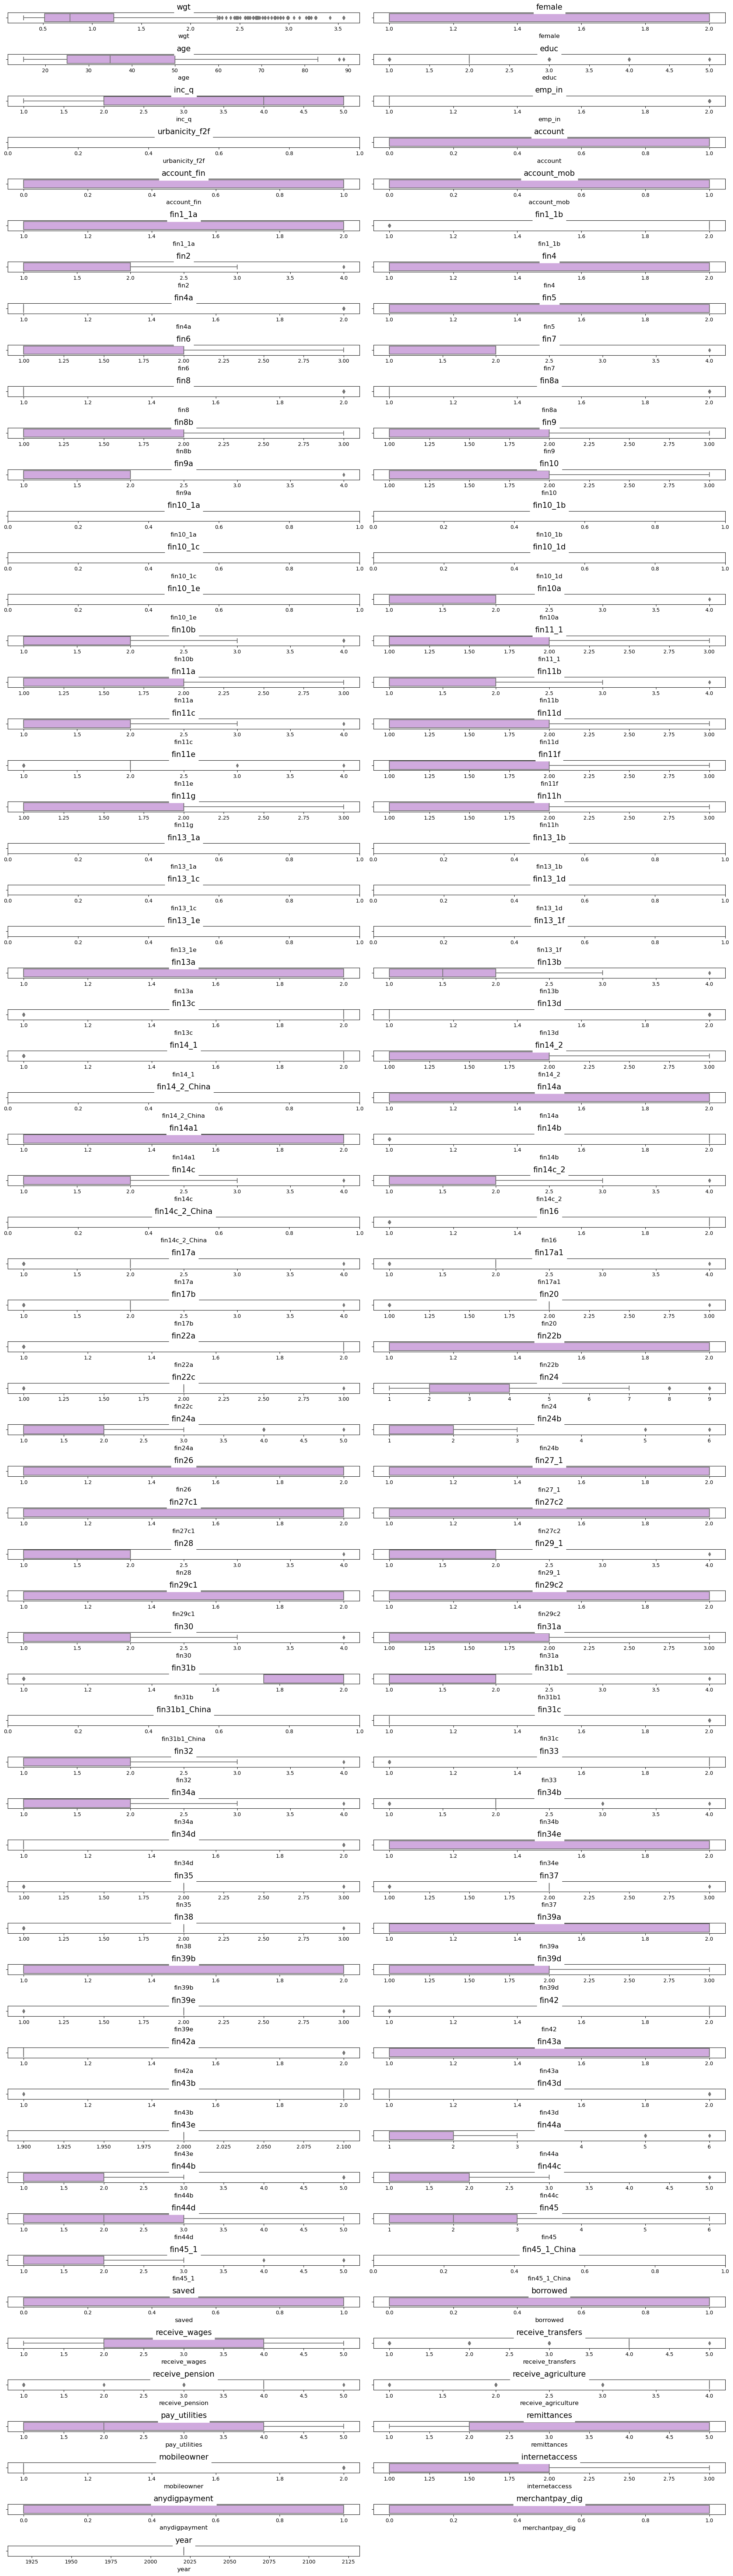

In [26]:
plt.figure(figsize=(20, 70))

num_features = len(num.columns)  # Count number of numerical features
rows = math.ceil(num_features / 2)  # Adjust rows dynamically

for idx, col in enumerate(num.columns):
    plt.subplot(rows, 2, idx + 1)  # Dynamically adjust grid size
    sns.boxplot(x=col, data=colombia_df_cleaned, palette=["#D4A1E7", "#6faea4"])
    plt.title(col, backgroundcolor='white', color='black', fontsize=15)
    plt.xlabel(col, size=12)

plt.tight_layout()
plt.show()


In [27]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(num.describe().T)


                      count         mean        std          min          25%  \
wgt                  1000.0     1.000000   0.706789     0.304952     0.516969   
female               1000.0     1.460000   0.498647     1.000000     1.000000   
age                  1000.0    37.967000  15.973449    15.000000    25.000000   
educ                 1000.0     2.024000   0.619522     1.000000     2.000000   
inc_q                1000.0     3.345000   1.410661     1.000000     2.000000   
emp_in               1000.0     1.176000   0.381011     1.000000     1.000000   
urbanicity_f2f          0.0          NaN        NaN          NaN          NaN   
account              1000.0     0.673000   0.469352     0.000000     0.000000   
account_fin          1000.0     0.633000   0.482228     0.000000     0.000000   
account_mob          1000.0     0.291000   0.454451     0.000000     0.000000   
fin1_1a               467.0     1.252677   0.435013     1.000000     1.000000   
fin1_1b               467.0 